In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import re
import os
import matplotlib.pyplot as plt

tf.__version__
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/train.csv")
df_val = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/val.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/test.csv")


In [ ]:
df_train[df_train.duplicated()]


,text,augmented_text
6906,a league live streaming updates,a elgaue ivle streaming updates
9455,abc business news and market analysis,abc buisnses news and maretk analysis
9476,abc business news and market analysis,abc business ensw and market anyalsis
9487,abc business news and market analysis,abc ubisness news and market analysis
9498,abc business news and market analysis,abc busienss wnes and market analysis
...,...,...
742784,wednesday finance with alan kohler,wednesday finnaec with lana kohler
742790,wednesday finance with alan kohler,wednesday finance with lana kohler
742816,wednesday finance with alan kohler,wednesday finance with lana kohler
742873,wednesday markets with fiona clark,wednesday markets iwht fiona lcakr


In [ ]:
df_val[df_val.duplicated()]


,text,augmented_text
42958,abc business news and market analysis,abc ubsiness news and market analysis
150906,abc business news and market analysis,abc usbiness news and mraekt analysis


In [ ]:
df_test[df_test.duplicated()]


,text,augmented_text
52797,abc business news and market analysis,abc business wnes and market aanlyiss
98255,abc business news and market analysis,abc ubsiness news and market analysis


In [ ]:
# def clean_data(text):
#     text = text.lower()
#     text = re.sub(r"[-=+*\"#@!$%^&()`<>/[\]]","",text)
#     text = re.sub(r"i'm","i am",text)
#     text = re.sub(r"he's","he is",text)
#     text = re.sub(r"she's","she is",text)
#     text = re.sub(r"it's","it is",text)
#     text = re.sub(r"they're","they are",text)
#     text = re.sub(r"there're","there are",text)
#     text = re.sub(r"there's","there is",text)
#     text = re.sub(r"how're","how are",text)
#     text = re.sub(r"what're","what are",text)
#     text = re.sub(r"where're","where ",text)
#     text = re.sub(r"who're","who are",text)
#     text = re.sub(r"that're","that are",text)
#     text = re.sub(r"when're","when are",text)
#     text = re.sub(r"how's","how is",text)
#     text = re.sub(r"what's","what is",text)
#     text = re.sub(r"where's","where is",text)
#     text = re.sub(r"who's","who is",text)
#     text = re.sub(r"that's","that is",text)
#     text = re.sub(r"when's","when is",text)
#     text = re.sub(r"won't","would not",text)
#     text = re.sub(r"nt't","can not",text)
#     text = re.sub(r"\'bout'","about",text)
#     text = re.sub(r"\'till'","untill",text)
#     text = re.sub(r"\'ll","will",text)
#     text = re.sub(r"\'ve","have",text)
#     text = re.sub(r"\'re","are",text)
#     text = re.sub(r"\'d","would",text)
#     text = re.sub(r"\."," ",text)
#     text = re.sub(r"\,"," ",text)
#     text = re.sub(r"\!"," ",text)
#     text = re.sub(r"\?"," ",text)
#     text = re.sub(r"\;"," ",text)
#     text = re.sub(r"\:"," ",text)
#     return text

    
# df_train['text'] = df_train['text'].apply(clean_data)
# df_train['augmented_text'] = df_train['augmented_text'].apply(clean_data)
# df_val['text'] = df_val['text'].apply(clean_data)
# df_val['augmented_text'] = df_val['augmented_text'].apply(clean_data)
# df_test['text'] = df_test['text'].apply(clean_data)
# df_test['augmented_text'] = df_test['augmented_text'].apply(clean_data)
# data = pd.concat([df_train,df_val,df_test])


In [ ]:
# data.to_csv('/content/drive/MyDrive/Colab_Notebooks/data.csv',index=False,)

In [ ]:
#data.csv is being pre-process to save time for training
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/data.csv')

In [ ]:
print(data.isnull().sum())
data = data.drop_duplicates(subset=['augmented_text'])
# data = (data[data["augmented_text"] != "name"])
print(data.duplicated().sum())

text              0
augmented_text    0
dtype: int64
0


In [ ]:
df = data

In [ ]:
df.describe()

,text,augmented_text
count,1024690,1024690
unique,1017097,1024690
top,abc business news and market analysis,1 billion darling hsarfbour redeevelopment p3...
freq,516,1


In [ ]:

train_df = df['augmented_text']
test_df = df['text']
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train_df, test_df, test_size=0.2, random_state=0)
val_x, test_x,val_y, test_y = train_test_split(test_x, test_y, test_size = 0.5, random_state=42)


In [ ]:
train_x

161481           counfii digbs off on parks indigenkhs name
61863       backbemches hle out hope for child care cgsnges
900739    two more councillors resign frn xenmari lova  ...
55388           zustrzlian killed in azerbz8jan plane crash
349300    japanese hwlaing lfeets claim an abslouet lie sea
                                ...                        
963542    trump grand military paqdes and not so grsnr q...
118001                     cxge sud9ends operations in iraq
435903                    orme money lost on benidog pokies
305771                     hlc ey backs coal rkjalty scheme
985926      memornaudm sgnied to improve interaction within
Name: augmented_text, Length: 819752, dtype: object

In [ ]:
train_y

161481           council signs off on parks indigenous name
61863     backbenchers hold out hope for child care changes
900739    two more councillors resign from denmark local...
55388           australian killed in azerbaijan plane crash
349300    japanese whaling fleets claim an absolute lie sea
                                ...                        
963542    trump grand military parades and not so grand ...
118001                     care suspends operations in iraq
435903                    more money lost on bendigo pokies
305771                     hickey backs coal royalty scheme
985926      memorandum signed to improve interaction within
Name: text, Length: 819752, dtype: object

In [ ]:
max_length = 74

In [ ]:

g_text_tokenizer = Tokenizer(char_level=True)
g_text_tokenizer.fit_on_texts(train_x)
g_text_word_index = g_text_tokenizer.word_index
train_sequences = g_text_tokenizer.texts_to_sequences(train_x)
train_padded = pad_sequences(train_sequences, maxlen = max_length, padding='post')


text_tokenizer = Tokenizer(char_level=True)
text_tokenizer.fit_on_texts(train_y)
text_word_index = text_tokenizer.word_index
test_sequences = text_tokenizer.texts_to_sequences(train_y)
test_padded = pad_sequences(test_sequences,maxlen = max_length, padding='post')





In [ ]:
text_tokenizer.word_index

{' ': 1,
 "'": 32,
 '0': 27,
 '1': 29,
 '2': 30,
 '3': 33,
 '4': 34,
 '5': 31,
 '6': 35,
 '7': 37,
 '8': 38,
 '9': 36,
 'a': 3,
 'b': 19,
 'c': 11,
 'd': 12,
 'e': 2,
 'f': 18,
 'g': 17,
 'h': 14,
 'i': 7,
 'j': 24,
 'k': 23,
 'l': 10,
 'm': 15,
 'n': 9,
 'o': 6,
 'p': 16,
 'q': 26,
 'r': 4,
 's': 5,
 't': 8,
 'u': 13,
 'v': 22,
 'w': 20,
 'x': 25,
 'y': 21,
 'z': 28}

In [ ]:
val_train_sequences = g_text_tokenizer.texts_to_sequences(val_x)
val_train_padded = pad_sequences(val_train_sequences, maxlen = max_length, padding='post')

val_test_sequences = text_tokenizer.texts_to_sequences(val_y)
val_test_padded = pad_sequences(val_test_sequences, maxlen = max_length, padding='post')

In [ ]:
g_vocab_size = len(g_text_word_index)+1
vocab_size = len(text_word_index)+1
print(g_vocab_size, vocab_size)

40 39


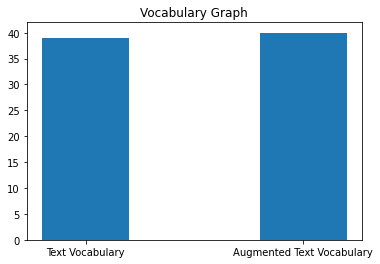

In [ ]:
voc = ["Text Vocabulary", "Augmented Text Vocabulary"]
voc_count = [vocab_size, g_vocab_size]

plt.bar(voc, voc_count, width = 0.4)
plt.title("Vocabulary Graph")
plt.show()

In [ ]:
temp_test_padded = test_padded.reshape((test_padded.shape[0], test_padded.shape[1],1))


In [ ]:
epoch = 20

In [ ]:
#combine the first two methods
from keras.regularizers import l2
model_4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=g_vocab_size, output_dim=512, input_length=max_length, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),

    tf.keras.layers.RepeatVector(max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(80,  return_sequences=True)),

    # tf.keras.layers.Dropout(0.3),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(vocab_size,activation='softmax')
])
learning_rate = 0.0005
optimizer = tf.keras.optimizers.Adam(learning_rate)
# learning_rate = 0.0001
# optimizer = tf.keras.optimizers.RMSprop(learning_rate)
# optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)
model_4.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=['accuracy'])
model_4.summary(expand_nested=True,
    show_trainable=True)

Model: "sequential"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 embedding (Embedding)       (None, 74, 512)           20480     Y          
                                                                            
 bidirectional (Bidirectiona  (None, 512)              1574912   Y          
 l)                                                                         
                                                                            
 repeat_vector (RepeatVector  (None, 74, 512)          0         Y          
 )                                                                          
                                                                            
 bidirectional_1 (Bidirectio  (None, 74, 512)          1574912   Y          
 nal)                                                                       
                                                        

Epoch 1/20
2733/2733 [==============================] - 604s 214ms/step - loss: 1.7549 - accuracy: 0.4919 - val_loss: 1.5287 - val_accuracy: 0.5462
Epoch 2/20
2733/2733 [==============================] - 581s 213ms/step - loss: 1.2112 - accuracy: 0.6326 - val_loss: 0.9957 - val_accuracy: 0.6936
Epoch 3/20
2733/2733 [==============================] - 581s 213ms/step - loss: 0.8784 - accuracy: 0.7345 - val_loss: 0.7884 - val_accuracy: 0.7661
Epoch 4/20
2733/2733 [==============================] - 580s 212ms/step - loss: 0.7367 - accuracy: 0.7811 - val_loss: 0.6964 - val_accuracy: 0.7917
Epoch 5/20
2733/2733 [==============================] - 581s 213ms/step - loss: 0.6566 - accuracy: 0.8053 - val_loss: 0.6173 - val_accuracy: 0.8176
Epoch 6/20
2733/2733 [==============================] - 581s 213ms/step - loss: 0.5990 - accuracy: 0.8209 - val_loss: 0.5820 - val_accuracy: 0.8280
Epoch 7/20
2733/2733 [==============================] - 581s 213ms/step - loss: 0.5622 - accuracy: 0.8312 - val_

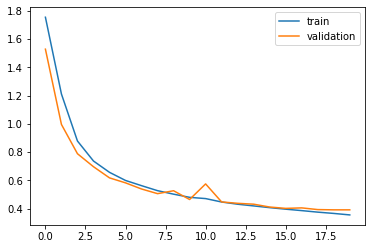

In [24]:
his_4 = model_4.fit(train_padded, test_padded, batch_size=300, epochs=epoch, validation_data = (val_train_padded, val_test_padded))

plt.plot(his_4.history['loss'])
plt.plot(his_4.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [25]:
# model.save('/content/drive/MyDrive/Colab_Notebooks/accuracy_84_3lstm_rnn_8inputlength')

In [26]:
test_sample = test_x.iloc[:10]
test_sample = g_text_tokenizer.texts_to_sequences(test_sample)
test_sample = pad_sequences(test_sample, maxlen=max_length, padding='post')


In [27]:
test_x.iloc[:10]

775998    wa rolls out qr xkdes for contact teacong as b...
681386          three seriously inkurd in ballarat qccidebt
384277                 local ccylists finish outr de france
951111       wadeye residents eskeing return to outstaitosn
447964      mystrye of missing olrf harris painting remains
921442       xomstic markets flat deslits ihtereet rate cut
105140               businxsman pays 840000 for numhr plate
41074     art exhibition 4este boundaries of mkderm femi...
521659         police consider wpefd in fatzp wodonga cfasn
550832               ypen bojetcs to pms holocaust allusion
Name: augmented_text, dtype: object

In [28]:
test_y.iloc[:10]

775998    wa rolls out qr codes for contact tracing as b...
681386         three seriously injured in ballarat accident
384277                 local cyclists finish tour de france
951111       wadeye residents seeking return to outstations
447964      mystery of missing rolf harris painting remains
921442      domestic markets flat despite interest rate cut
105140             businessman pays 840000 for number plate
41074     art exhibition tests boundaries of modern femi...
521659         police consider speed in fatal wodonga crash
550832               pyne objects to pms holocaust allusion
Name: text, dtype: object

In [29]:
pre = model_4.predict(test_sample)
def deTokenize(logits):
    index_to_words = {id: word for word, id in text_tokenizer.word_index.items()}
    index_to_words[0] = ''
    pre_index = np.argmax(logits, 1)
    return ''.join(index_to_words[prediction] for prediction in pre_index)
predict = []
for i in range(10):
  predict.append(deTokenize(pre[i]))

In [30]:
eva = pd.DataFrame({'input': test_x.iloc[:10], 'output': test_y.iloc[:10], 'predict':predict})
eva


,input,output,predict
775998,wa rolls out qr xkdes for contact teacong as b...,wa rolls out qr codes for contact tracing as b...,wa tolls out ar ieds for cootactt eaccnn aa ...
681386,three seriously inkurd in ballarat qccidebt,three seriously injured in ballarat accident,three seriously inkure in ballarat accident
384277,local ccylists finish outr de france,local cyclists finish tour de france,local cyclists finish tour de france
951111,wadeye residents eskeing return to outstaitosn,wadeye residents seeking return to outstations,wadeyy residents seeking return to outstttioos
447964,mystrye of missing olrf harris painting remains,mystery of missing rolf harris painting remains,mystree of missing lorf harris painting remains
921442,xomstic markets flat deslits ihtereet rate cut,domestic markets flat despite interest rate cut,comsstcc markees faay deelits itereet ateectt
105140,businxsman pays 840000 for numhr plate,businessman pays 840000 for number plate,businesman pays 400000 foor nuur late
41074,art exhibition 4este boundaries of mkderm femi...,art exhibition tests boundaries of modern femi...,art exhibition teste boundaries of modder emi...
521659,police consider wpefd in fatzp wodonga cfasn,police consider speed in fatal wodonga crash,police consider speer in fatta wooongg ccaas
550832,ypen bojetcs to pms holocaust allusion,pyne objects to pms holocaust allusion,pyne bojjcts to pms holoccust allusion


In [31]:
print("Iutput:    ",test_x.iloc[7])
print("Actual:    ",test_y.iloc[7])
print("Predicted: ",deTokenize(pre[7]))

Iutput:     art exhibition 4este boundaries of mkderm femin8sj
Actual:     art exhibition tests boundaries of modern feminism
Predicted:  art exhibition teste boundaries of modder  eminiss
